In [3]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [4]:
def load_asd_data_with_pandas(data_path: str = "/content/drive/MyDrive/Antibody_Chekalin_Denis/asd") -> pd.DataFrame:
    """
    Загружает все parquet файлы из папки asd в один pandas DataFrame
    """
    # Получаем все parquet файлы из папки
    parquet_files = glob.glob(os.path.join(data_path, "part-*.parquet"))

    if not parquet_files:
        raise ValueError(f"Не найдено parquet файлов в папке {data_path}")

    print(f"Найдено {len(parquet_files)} parquet файлов")

    # Загружаем все файлы в список DataFrame'ов
    dataframes = []
    for file_path in parquet_files:
        # print(f"Загружаем файл: {os.path.basename(file_path)}")
        df = pd.read_parquet(file_path)
        dataframes.append(df)

    # Объединяем все DataFrame'ы в один
    combined_df = pd.concat(dataframes, ignore_index=True)

    print(f"Общий размер данных: {combined_df.shape}")
    print(f"Колонки: {list(combined_df.columns)}")

    return combined_df

# Загружаем данные
agab_df = load_asd_data_with_pandas('../asd')

Найдено 20 parquet файлов
Общий размер данных: (1227083, 11)
Колонки: ['dataset', 'heavy_sequence', 'light_sequence', 'scfv', 'affinity_type', 'affinity', 'antigen_sequence', 'confidence', 'nanobody', 'metadata', 'processed_measurement']


In [6]:
agab_filtered_df = pd.read_parquet("../agab_filtered.parquet")

In [4]:
agab_df.groupby('dataset')['antigen_sequence'].agg([
    ('total_count', 'count'),
    ('unique_antigens', 'nunique')
]).sort_values('unique_antigens', ascending=False)

,total_count,unique_antigens
dataset,,
patents,217463,6082
structures-antibodies,2711,1083
hiv,48008,940
literature,5636,884
biomap,2725,594
structures-nanobodies,1258,390
genbank,2989,347
covid-19,54625,32
skempiv2,434,21


In [5]:
agab_df.groupby('affinity_type')['antigen_sequence'].agg([
    ('total_count', 'count'),
    ('unique_antigens', 'nunique')
]).sort_values('unique_antigens', ascending=False)

,total_count,unique_antigens
affinity_type,,
bool,336761,9197
delta_g,2725,594
ddg,670,22
elisa_mut_to_wt_ratio,658,13
kd,7007,11
ic_50,360,10
-log KD,152401,5
alphaseq,198703,3
log_enrichment,3452,2


In [7]:
agab_filtered_df.groupby('affinity_type')['antigen_sequence'].agg([
    ('total_count', 'count'),
    ('unique_antigens', 'nunique')
]).sort_values('unique_antigens', ascending=False)

,total_count,unique_antigens
affinity_type,,
elisa_mut_to_wt_ratio,168,12
ic_50,349,10
kd,6743,8
-log KD,83075,5
alphaseq,54111,2
fuzzy,172149,1
log_enrichment,1016,1


### Проверка для agab_df после anarci

In [9]:
agab_df = pd.read_parquet('../agab.parquet')

Статистика длин antigen_sequence:
Всего последовательностей: 336741
Минимальная длина: 14
Максимальная длина: 34350
Средняя длина: 472.54
Медианная длина: 607.0

Квантиль 5%:  14.0
Квантиль 25%:  312.0
Квантиль 75%:  607.0
Квантиль 95%:  607.0



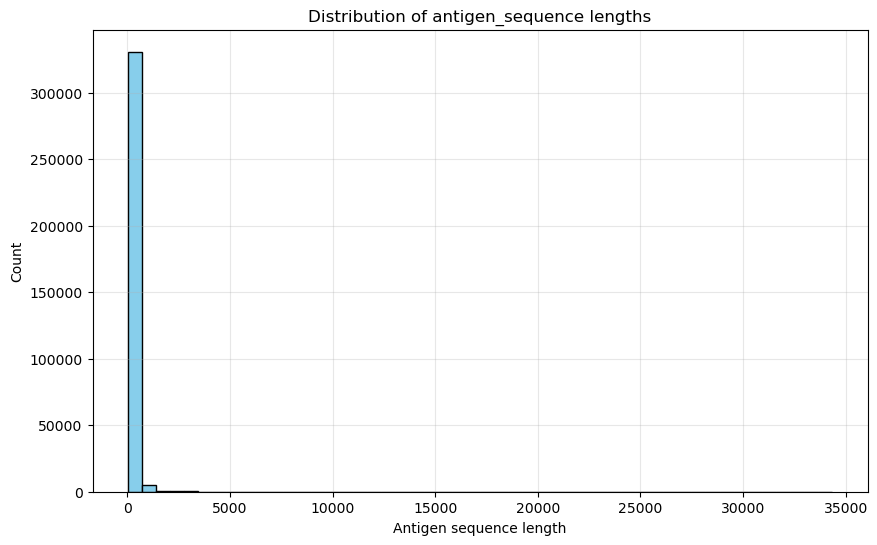

In [10]:
import matplotlib.pyplot as plt

# Получаем длины всех последовательностей
antigen_lengths = agab_df['antigen_sequence'].dropna().map(len)

# Текстовая сводка (можно скопировать)
print("Статистика длин antigen_sequence:")
print(f"Всего последовательностей: {len(antigen_lengths)}")
print(f"Минимальная длина: {antigen_lengths.min()}")
print(f"Максимальная длина: {antigen_lengths.max()}")
print(f"Средняя длина: {antigen_lengths.mean():.2f}")
print(f"Медианная длина: {antigen_lengths.median()}")
print("\nКвантиль 5%: ", antigen_lengths.quantile(0.05))
print("Квантиль 25%: ", antigen_lengths.quantile(0.25))
print("Квантиль 75%: ", antigen_lengths.quantile(0.75))
print("Квантиль 95%: ", antigen_lengths.quantile(0.95))
print()

# Для копирования: гистограмма частот (length,count) в текстовом виде
# hist = antigen_lengths.value_counts().sort_index()
# print("Length\tCount")
# for l, c in hist.items():
#     print(f"{l}\t{c}")

# График распределения длин
plt.figure(figsize=(10,6))
plt.hist(antigen_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Antigen sequence length')
plt.ylabel('Count')
plt.title('Distribution of antigen_sequence lengths')
plt.grid(True, alpha=0.3)
plt.show()